In [55]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


path = '../../data-20240427T110720Z-001\data\skylab_instagram_datathon_dataset.csv'
print(path)


../../data-20240427T110720Z-001\data\skylab_instagram_datathon_dataset.csv


In [56]:
df=pd.read_csv(path, delimiter= ";")
df.head()

,period,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,calculation_type,followers,pictures,videos,comments,likes
0,Weekly,2019-12-07,Luxury & Premium & Mainstream,Soft Luxury,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,22066189.0,97.0,13.0,16239.0,6112205.0
1,Weekly,2021-01-30,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,24289963.0,54.0,2.0,13358.0,3189144.0
2,Weekly,2016-05-14,Luxury & Premium & Mainstream,Soft Luxury,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,7137442.0,42.0,8.0,15894.0,2152955.0
3,Weekly,2019-04-20,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,18901125.0,73.0,9.0,26762.0,5224916.0
4,Weekly,2023-03-25,Luxury & Premium & Mainstream,US Softlines Analyst Interest List,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,30251374.0,54.0,10.0,25681.0,5760987.0


In [57]:
print(df.shape)

(704313, 15)


In [58]:
compset_group_freq = df['compset_group'].value_counts()
compset_group_freq = df['compset_group'].value_counts()


compset_freq = df['compset'].value_counts()

print("Frequency of compset_group:")
print(compset_group_freq)
print("\nFrequency of compset:")
print(compset_freq)

Frequency of compset_group:
Luxury & Premium & Mainstream    216241
Apparel Retail                   209573
Sportswear & Athleisure           57068
Beauty & Boutique                 44266
Food Products                     42612
Beverages                         41471
Restaurants                       37599
Outdoor Gear                       9536
Fitness & Exercise                 8978
Dermatology and Orthodontics       7819
Mattress                           5107
Petcare                            4896
Building Products                  4376
Sporting Goods                     3185
Home Appliances                    3013
Food Retail                        2574
Toys & Collectibles                2229
Discount Retailers                 2100
Entertainment                      1215
Study (All Brands)                  455
Name: compset_group, dtype: int64

Frequency of compset:
US Softlines Analyst Interest List      113744
Apparel Retail                           69341
Luxury & Premium & Ma

In [59]:
types = df.dtypes
type_counts = types.value_counts
print(type_counts)

<bound method IndexOpsMixin.value_counts of period                                     object
period_end_date                            object
compset_group                              object
compset                                    object
business_entity_doing_business_as_name     object
legal_entity_name                          object
domicile_country_name                      object
ultimate_parent_legal_entity_name          object
primary_exchange_name                      object
calculation_type                           object
followers                                 float64
pictures                                  float64
videos                                    float64
comments                                  float64
likes                                     float64
dtype: object>


In [60]:
missing_data = df.isnull().sum()
print(missing_data)
missing_info = pd.DataFrame({'Missing values': missing_data, 'Percentage': missing_percentage})

period                                         0
period_end_date                                0
compset_group                                  0
compset                                        0
business_entity_doing_business_as_name         0
legal_entity_name                          27755
domicile_country_name                     245724
ultimate_parent_legal_entity_name          27755
primary_exchange_name                     245724
calculation_type                               0
followers                                 125055
pictures                                    8510
videos                                     19964
comments                                    8970
likes                                       8336
dtype: int64


NameError: name 'missing_percentage' is not defined

In [ ]:
metrics = df
df['engagement_rate'] = (df['comments'] + df['likes']) / df['followers']
df['video_engagement'] = df['videos'] / df['followers']
df['picture_engagement'] = df['pictures'] / df['followers']
df['comment_to_like_ratio'] = df['comments'] / df['likes']
df['video_to_picture_ratio'] = df['videos'] / df['pictures']

# If Total Posts is needed
df['total_posts'] = df['pictures'] + df['videos']
df['normalized_comments'] = df['comments'] / df['total_posts']
df['normalized_likes'] = df['likes'] / df['total_posts']

# Display the new DataFrame with calculated metrics
print(df[['engagement_rate', 'video_engagement', 'picture_engagement', 
          'comment_to_like_ratio', 'video_to_picture_ratio', 'normalized_comments', 'normalized_likes']])

        engagement_rate  video_engagement  picture_engagement  \
0              0.277730      5.891366e-07            0.000004   
1              0.131845      8.233854e-08            0.000002   
2              0.303869      1.120850e-06            0.000006   
3              0.277850      4.761621e-07            0.000004   
4              0.191286      3.305635e-07            0.000002   
...                 ...               ...                 ...   
704308              NaN               NaN                 NaN   
704309         0.219389      1.220457e-05            0.000763   
704310         0.025119      1.095513e-04            0.000369   
704311         0.136188      8.745119e-06            0.000564   
704312         0.043635      1.061452e-04            0.000412   

        comment_to_like_ratio  video_to_picture_ratio  normalized_comments  \
0                    0.002657                0.134021           147.627273   
1                    0.004189                0.037037          

    period period_end_date                  compset_group  \
1   Weekly      2021-01-30  Luxury & Premium & Mainstream   
3   Weekly      2019-04-20  Luxury & Premium & Mainstream   
10  Weekly      2015-03-28  Luxury & Premium & Mainstream   
12  Weekly      2016-06-25  Luxury & Premium & Mainstream   
15  Weekly      2020-03-14  Luxury & Premium & Mainstream   

                          compset business_entity_doing_business_as_name  \
1   Luxury & Premium & Mainstream                                Versace   
3   Luxury & Premium & Mainstream                                Versace   
10  Luxury & Premium & Mainstream                                Versace   
12  Luxury & Premium & Mainstream                                Versace   
15  Luxury & Premium & Mainstream                                Versace   

   legal_entity_name     domicile_country_name  \
1     Capri Holdings  United States of America   
3     Capri Holdings  United States of America   
10    Capri Holdings  Unit

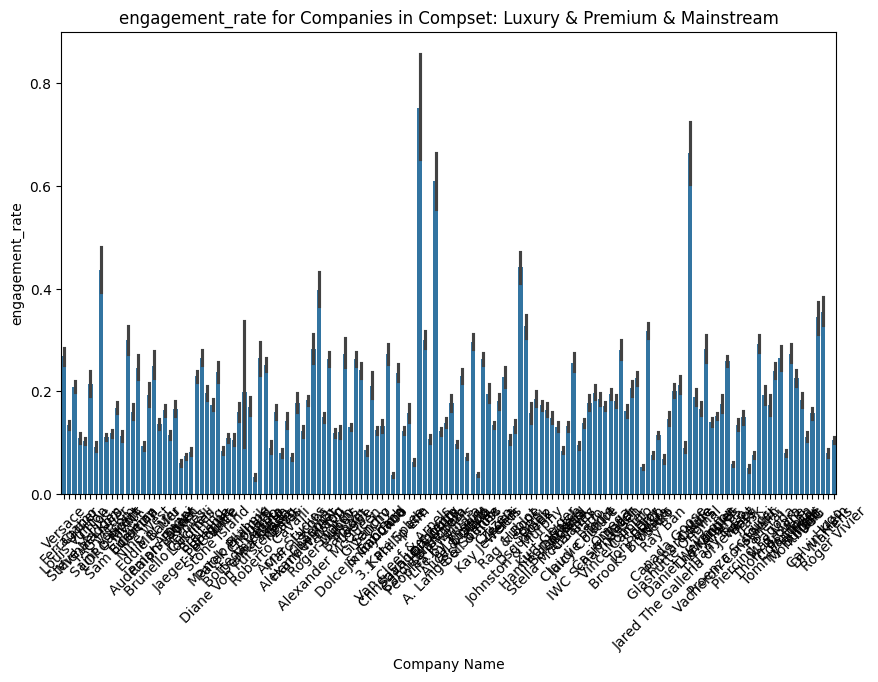

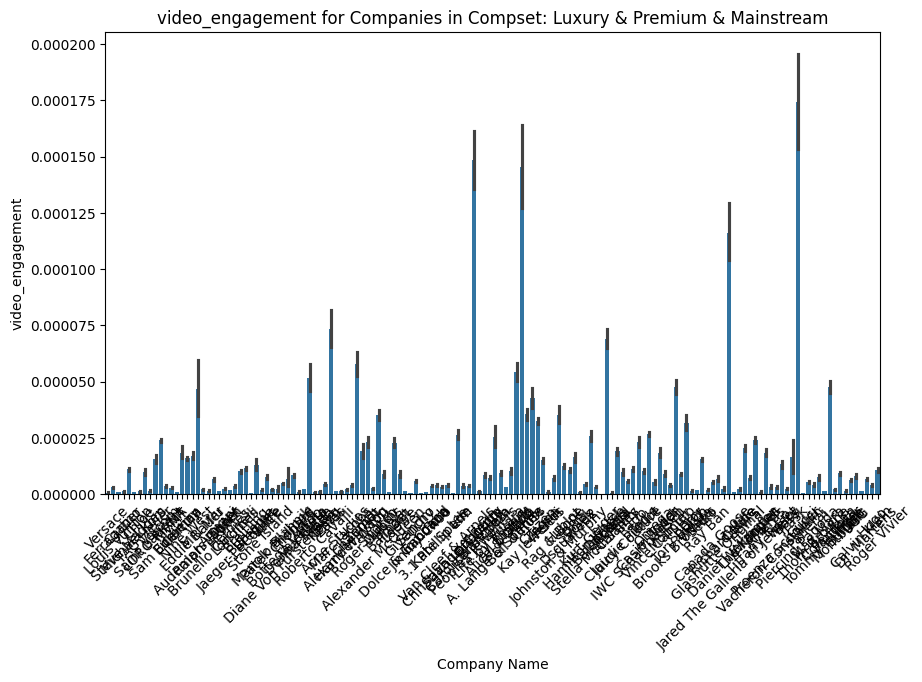

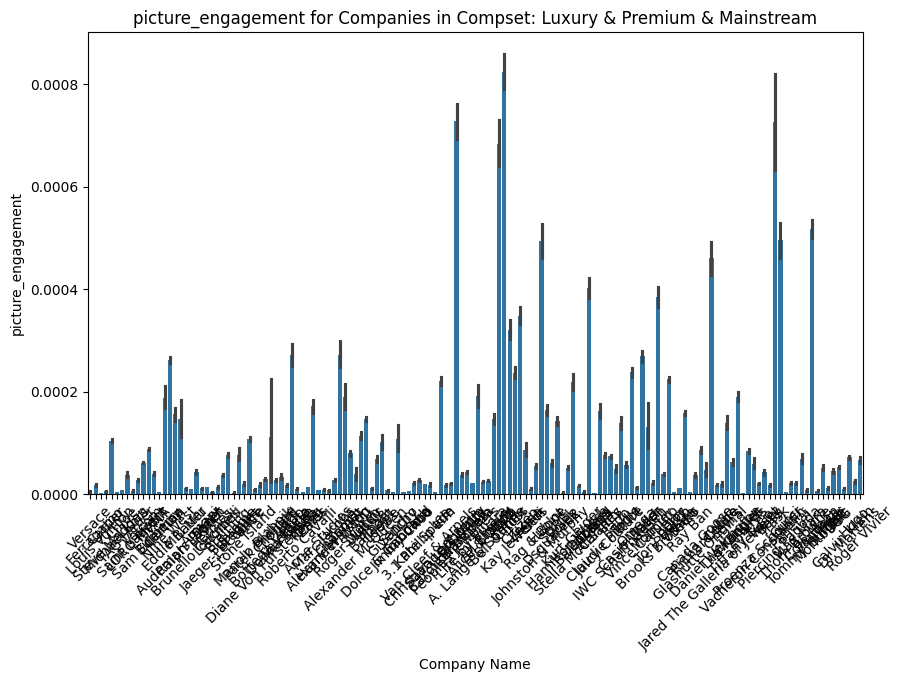

In [ ]:
df['engagement_rate'] = (df['comments'] + df['likes']) / df['followers']
df['video_engagement'] = df['videos'] / df['followers']
df['picture_engagement'] = df['pictures'] / df['followers']

# Then apply the filter
selected_compset = 'Luxury & Premium & Mainstream'
filtered_df = df[df['compset'] == selected_compset]

print(filtered_df.head())

if filtered_df.empty:
    print("Filtered DataFrame is empty. Check the 'compset' values and selection criteria.")
else:
    print("Filtered DataFrame is not empty. Proceeding with melting and plotting.")

if not filtered_df.empty:
    metrics = ['engagement_rate', 'video_engagement', 'picture_engagement']
    for metric in metrics:
        plt.figure(figsize=(10, 6))
        sns.barplot(x='business_entity_doing_business_as_name', y=metric, data=filtered_df)
        plt.title(f'{metric} for Companies in Compset: {selected_compset}')
        plt.xlabel('Company Name')
        plt.ylabel(metric)
        plt.xticks(rotation=45)
        plt.show()

Filtered DataFrame is not empty. Proceeding with plotting.
['Bottega Veneta' 'Savage X Fenty' 'Chaumet' 'Daniel Wellington' 'Sandro'
 'Valentino' 'Off-White' 'Balmain' 'Calvin Klein' 'TAG Heuer' 'Panerai'
 'Hublot' 'Audemars Piguet' 'Richard Mille' 'Prada' 'Chopard'
 'Thom Browne' 'Celine' 'Zenith' 'Dsquared2' 'A. Lange & Soehne'
 'Michael Kors' 'Tommy Hilfiger' 'Rolex' 'Dior' 'Tudor' 'Fendi'
 'Montblanc' 'Versace' 'SOREL' 'Zegna' 'Louis Vuitton' 'Bell & Ross'
 'Certina' 'Burberry' 'Dr. Martens' 'Pandora' 'Bulgari' 'Stone Island'
 'Timex' 'Cartier' 'Coach' 'The Kooples' 'AllSaints' 'Gucci' 'Armani'
 'Loewe' 'MVMT' 'Alexander McQueen' 'Tom Ford' 'Tory Burch'
 'Diane Von Furstenberg' 'Zales' 'Marc Jacobs' 'Breitling' 'Kay Jewelers'
 'All Brands' 'Dolce & Gabbana' 'Glashutte Original' 'Breguet'
 'Christian Louboutin' 'Carolina Herrera' 'Maje' 'Vacheron Constantin'
 'Eddie Bauer' 'Ralph Lauren' 'Miu Miu' 'Canada Goose' 'Max Mara' 'Omega'
 "Tod's" 'Boss' 'Balenciaga' 'Kate Spade' 'Supreme' 

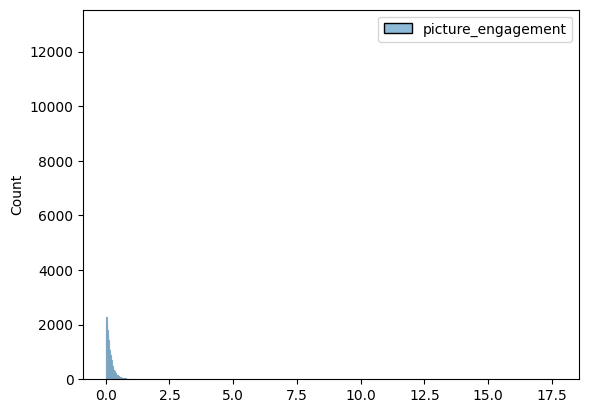

In [65]:
if filtered_df.empty:
    print("Filtered DataFrame is empty. Check the 'compset' values and selection criteria.")
else:
    print("Filtered DataFrame is not empty. Proceeding with plotting.")

    metrics = ['engagement_rate', 'video_engagement', 'picture_engagement']
    for metric in metrics:
        # Sort the DataFrame by the current metric in descending order
        sorted_df = filtered_df.sort_values(by=metric, ascending=False)
        unique_df = sorted_df['business_entity_doing_business_as_name'].unique()
        print(unique_df)
        
        print(sorted_df[['business_entity_doing_business_as_name', metric]])
        sns.histplot(sorted_df[['business_entity_doing_business_as_name', metric]])  
    plt.show()

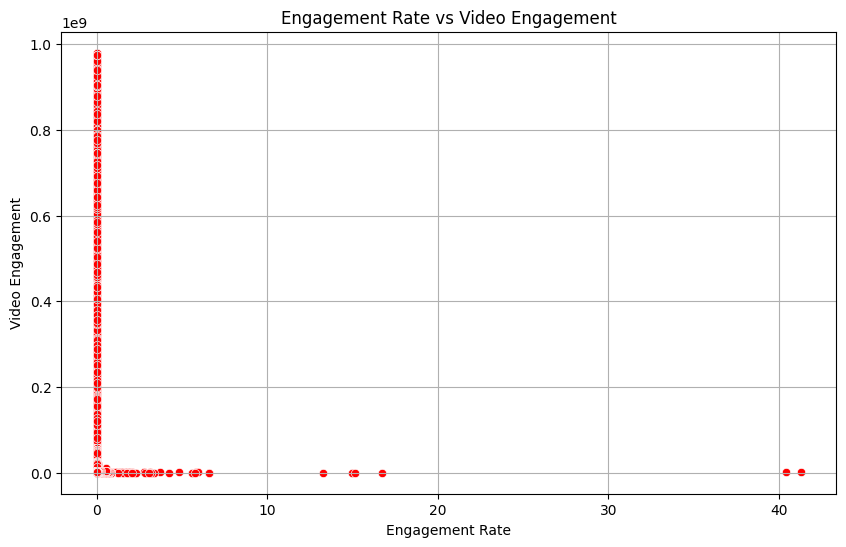

In [ ]:


plt.figure(figsize=(10, 6))  # Set the figure size
sns.scatterplot(x='comment_to_like_ratio', y='followers', data=filtered_df, color='red')
plt.title('Engagement Rate vs Video Engagement')  # Title of the plot
plt.xlabel('Engagement Rate')  # X-axis label
plt.ylabel('Video Engagement')  # Y-axis label
plt.grid(True)  # Show grid
plt.show()  # Display the plot

sns.lineplot('num_post','num_follower', data=ig_df)
plt.xlabel('# posts')
plt.ylabel('# followers')
plt.show()

In [67]:
plt.figure(figsize=(10, 6))

# Plotting both pictures and followers against date
plt.plot(df['date'], df['pictures'], label='Pictures', marker='o')  # Adding markers for clarity
plt.plot(df['date'], df['followers'], label='Followers', marker='o')

# Adding title and labels
plt.title('Pictures vs. Followers Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

KeyError: 'date'

<Figure size 1000x600 with 0 Axes>